In [1]:
# Subject: Introduction to Big Data, Analytics and Business Problem Framing
# Detail: Introduction to Python - week-03 assignment
# Date: November 20, 2017
# Prepared by Mazhar Khan

In [2]:
%matplotlib inline
# import naming conventions 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
hader_x = "id|postedTime|body|None|['twitter_entiteis:urls:url']|['None']|['actor:languages_list-items']|gnip:language:value|twitter_lang|[u'geo:coordinates_list-items']|geo:type|None|None|None|None|actor:utcOffset|None|None|None|None|None|None|None|None|None|actor:displayName|actor:preferredUsername|actor:id|gnip:klout_score|actor:followersCount|actor:friendsCount|actor:listedCount|actor:statusesCount|Tweet|None|None|None"
colnames = hader_x.split('|')

In [4]:
# prevent the automatic compression of wide dataframes (add scroll bar)
pd.set_option("display.max_columns", None)

# get some data, inspect
df1 = pd.read_csv('../data/twitter_sample.csv', sep='|', names=colnames)

df1.tail(7)

,id,postedTime,body,None,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
88,"tag:search.twitter.com,2005:351835320297328640",2013-07-01T22:50:51.000Z,@CheniseFowlisX yeah 😂,None,None,None,['en'],en,vi,"[53.28722009, -3.21569687]",Point,"['[-3.400604, 53.072143999999994]', '[-3.40060...",Polygon,"Flintshire, Flintshire",GB,0,Leeds- UK / Greenfield- Wales,None,None,None,None,None,None,None,None,marshaa,marshaleighm,269323425,44,767,486,0,17549,Reply,http://twitter.com/CheniseFowlisX/statuses/351...,None,None
89,"tag:search.twitter.com,2005:351835321220075524",2013-07-01T22:50:52.000Z,"@justinbagdr no, non mi far star meglio.",None,None,None,['it'],it,it,None,None,"['[14.1332005, 40.7920697]', '[14.1332005, 40....",Polygon,"Napoli, Napoli",IT,None,#bagdr @limitdemibagdr,None,None,None,None,None,None,None,None,demi.,demibagdr,1542203100,44,64,58,0,1872,Reply,http://twitter.com/justinbagdr/statuses/351833...,None,None
90,"tag:search.twitter.com,2005:351835321081659392",2013-07-01T22:50:51.000Z,@xhazzasdimples Probabile AHAHHAHAHAHAHAHAHAHA...,None,None,None,['it'],it,it,"[41.73604, 12.2890263]",Point,"['[12.2344266, 41.6558738]', '[12.2344266, 42....",Polygon,"Roma, Roma",IT,7200,Big Ben's tip,None,None,None,None,None,None,None,None,She's my Louis ❤,xliamsdreams,562092674,53,5084,3802,11,30163,Reply,http://twitter.com/xhazzasdimples/statuses/351...,None,None
91,"tag:search.twitter.com,2005:351835321442385921",2013-07-01T22:50:52.000Z,Mandei a foto do Piqué e o fc n respondeu até ...,None,None,None,['pt'],pt,pt,None,None,"['[-50.899727999999996, -21.454719]', '[-50.89...",Polygon,"Araçatuba, São Paulo",BR,-10800,na cama do mari :p,None,None,None,None,None,None,None,None,lorena uai ∞,Fc_GritaAmor,397609113,44,1248,1962,0,11161,Tweet,None,None,None
92,"tag:search.twitter.com,2005:351835321425608704",2013-07-01T22:50:52.000Z,"O matheus André ta me falando aqui , tem quase...",None,None,None,['pt'],pt,pt,"[-22.72046574, -43.57919689]",Point,"['[-43.645123999999996, -22.783967999999998]',...",Polygon,"Queimados, Rio de Janeiro",BR,-10800,Rio de Janeiro,None,None,None,None,None,None,None,None,Shelyda,ShelydaDays,70959019,40,128,76,0,1419,Tweet,None,None,None
93,"tag:search.twitter.com,2005:351835320859369475",2013-07-01T22:50:51.000Z,@Mulayhim hatha bs one exam. Other exams y6l3o...,None,None,None,['en'],en,en,"[52.21599153, 6.88528201]",Point,"['[6.7559955, 52.1611799]', '[6.7559955, 52.28...",Polygon,Enschede,NL,3600,Netherlands\Enschede,None,None,None,None,None,None,None,None,L,Karkooba,1252736376,30,48,88,0,957,Reply,http://twitter.com/Mulayhim/statuses/351817617...,None,None
94,"tag:search.twitter.com,2005:351835321471746048",2013-07-01T22:50:52.000Z,😕 Hmm...,None,None,None,['en'],None,en,"[42.21746118, -78.03367083]",Point,"['[-78.045887, 42.212985]', '[-78.045887, 42.2...",Polygon,"Belmont, NY",US,None,None,None,None,None,None,None,None,None,None,Lindsey Chamberlain,Linnyy_Kayy,466042520,41,198,188,0,1897,Tweet,None,None,None


In [5]:
# de;eting value "None"
del df1['None']

In [6]:
# have a peek
df1.tail(6)

,id,postedTime,body,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
89,"tag:search.twitter.com,2005:351835321220075524",2013-07-01T22:50:52.000Z,"@justinbagdr no, non mi far star meglio.",None,None,['it'],it,it,None,None,"['[14.1332005, 40.7920697]', '[14.1332005, 40....",Polygon,"Napoli, Napoli",IT,None,#bagdr @limitdemibagdr,None,None,None,None,None,None,None,None,demi.,demibagdr,1542203100,44,64,58,0,1872,Reply,http://twitter.com/justinbagdr/statuses/351833...,None,None
90,"tag:search.twitter.com,2005:351835321081659392",2013-07-01T22:50:51.000Z,@xhazzasdimples Probabile AHAHHAHAHAHAHAHAHAHA...,None,None,['it'],it,it,"[41.73604, 12.2890263]",Point,"['[12.2344266, 41.6558738]', '[12.2344266, 42....",Polygon,"Roma, Roma",IT,7200,Big Ben's tip,None,None,None,None,None,None,None,None,She's my Louis ❤,xliamsdreams,562092674,53,5084,3802,11,30163,Reply,http://twitter.com/xhazzasdimples/statuses/351...,None,None
91,"tag:search.twitter.com,2005:351835321442385921",2013-07-01T22:50:52.000Z,Mandei a foto do Piqué e o fc n respondeu até ...,None,None,['pt'],pt,pt,None,None,"['[-50.899727999999996, -21.454719]', '[-50.89...",Polygon,"Araçatuba, São Paulo",BR,-10800,na cama do mari :p,None,None,None,None,None,None,None,None,lorena uai ∞,Fc_GritaAmor,397609113,44,1248,1962,0,11161,Tweet,None,None,None
92,"tag:search.twitter.com,2005:351835321425608704",2013-07-01T22:50:52.000Z,"O matheus André ta me falando aqui , tem quase...",None,None,['pt'],pt,pt,"[-22.72046574, -43.57919689]",Point,"['[-43.645123999999996, -22.783967999999998]',...",Polygon,"Queimados, Rio de Janeiro",BR,-10800,Rio de Janeiro,None,None,None,None,None,None,None,None,Shelyda,ShelydaDays,70959019,40,128,76,0,1419,Tweet,None,None,None
93,"tag:search.twitter.com,2005:351835320859369475",2013-07-01T22:50:51.000Z,@Mulayhim hatha bs one exam. Other exams y6l3o...,None,None,['en'],en,en,"[52.21599153, 6.88528201]",Point,"['[6.7559955, 52.1611799]', '[6.7559955, 52.28...",Polygon,Enschede,NL,3600,Netherlands\Enschede,None,None,None,None,None,None,None,None,L,Karkooba,1252736376,30,48,88,0,957,Reply,http://twitter.com/Mulayhim/statuses/351817617...,None,None
94,"tag:search.twitter.com,2005:351835321471746048",2013-07-01T22:50:52.000Z,😕 Hmm...,None,None,['en'],None,en,"[42.21746118, -78.03367083]",Point,"['[-78.045887, 42.212985]', '[-78.045887, 42.2...",Polygon,"Belmont, NY",US,None,None,None,None,None,None,None,None,None,None,Lindsey Chamberlain,Linnyy_Kayy,466042520,41,198,188,0,1897,Tweet,None,None,None


In [7]:
#slicing & combining
# Subsetting a DataFrame is very similar to the syntax in R. There are two ways to select columns: 'dot' (attribute) notation, and 'square bracket' (index) notation. Sometimes, the column names will dictate which you have to use.

In [8]:
# inspect those rows with Tweet = Reply
df1[df1.Tweet == 'Reply'].head()

,id,postedTime,body,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,None,['en'],en,es,"[47.29088246, -101.0379045]",Point,"['[-101.043785, 47.275933]', '[-101.043785, 47...",Polygon,"Washburn, ND",US,-21600,sevenohone,None,None,None,None,None,None,None,None,cori▲alex.,CoBerg_,48025164,32,144,215,0,4071,Reply,http://twitter.com/shane_joersz/statuses/35182...,None,None
3,"tag:search.twitter.com,2005:351835317608792064",2013-07-01T22:50:51.000Z,@Gabo_navoficial yo tambien creo en ti mi char...,None,None,['en'],en,es,None,None,"['[-80.248663, 25.986366]', '[-80.248663, 26.0...",Polygon,"Hollywood, FL",US,-14400,hollywood florida,None,None,None,None,None,None,None,None,MARIA,maria_e_pena,461188787,50,438,174,1,17636,Reply,http://twitter.com/Gabo_navoficial/statuses/35...,None,None
8,"tag:search.twitter.com,2005:351835318028222465",2013-07-01T22:50:51.000Z,@pafcdan Aww good! X,None,None,['en'],en,en,"[50.3582949, -4.0930973]",Point,"['[-4.209496, 50.3320883]', '[-4.209496, 50.44...",Polygon,"Plymouth, Plymouth",GB,0,Plymouth,None,None,None,None,None,None,None,None,Becky ❤,BeckyLou90x,26568635,38,380,860,0,3116,Reply,http://twitter.com/pafcdan/statuses/3518344574...,None,None
10,"tag:search.twitter.com,2005:351835318044983298",2013-07-01T22:50:51.000Z,@DiegoSanRoman no y no me gusta.,None,None,['en'],en,es,"[19.34964, -99.19341]",Point,"['[-99.32437499999999, 19.232228]', '[-99.3243...",Polygon,"Álvaro Obregón, Distrito Federal",MX,-28800,None,None,None,None,None,None,None,None,None,Carlos Hermosillo,CHermosillo_FOX,1160945754,62,11873,69,56,1991,Reply,http://twitter.com/DiegoSanRoman/statuses/3515...,None,None
15,"tag:search.twitter.com,2005:351835318724468737",2013-07-01T22:50:51.000Z,@Hayley_Brownn Same!!!! Very sad times😞😞😞😞,None,None,['en'],en,en,"[54.6884467, -3.51776393]",Point,"['[-3.580063, 54.454108]', '[-3.580063, 54.964...",Polygon,"Allerdale, Cumbria",GB,-36000,None,None,None,None,None,None,None,None,None,Karl Hine,KarlHine,402334657,42,417,259,1,5242,Reply,http://twitter.com/Hayley_Brownn/statuses/3518...,None,None


In [9]:
# inspect those rows with twitter-classified lang 'en' 
df1[df1.twitter_lang == 'en'].head()

,id,postedTime,body,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
8,"tag:search.twitter.com,2005:351835318028222465",2013-07-01T22:50:51.000Z,@pafcdan Aww good! X,None,None,['en'],en,en,"[50.3582949, -4.0930973]",Point,"['[-4.209496, 50.3320883]', '[-4.209496, 50.44...",Polygon,"Plymouth, Plymouth",GB,0,Plymouth,None,None,None,None,None,None,None,None,Becky ❤,BeckyLou90x,26568635,38,380,860,0,3116,Reply,http://twitter.com/pafcdan/statuses/3518344574...,None,None
9,"tag:search.twitter.com,2005:351835318346981377",2013-07-01T22:50:51.000Z,Newest hobby: sending videos back and forth of...,None,None,['en'],en,en,"[29.54588264, -95.10669141]",Point,"['[-95.145152, 29.506973]', '[-95.145152, 29.5...",Polygon,"Webster, TX",US,None,"Houston, Texas",None,None,None,None,None,None,None,None,lil beyoncé,beezlebrat,541953037,41,160,135,0,4170,Tweet,None,None,None
11,"tag:search.twitter.com,2005:351835318024028161",2013-07-01T22:50:51.000Z,~FINALLY OFF OF WORK~,None,None,['en'],en,en,"[32.86107, -83.72062]",Point,"['[-83.739741, 32.765651]', '[-83.739741, 32.8...",Polygon,"Macon, GA",US,None,None,None,None,None,None,None,None,None,None,Tomeisha Cross,MISSMEISHA223,242505369,18,290,683,0,540,Tweet,None,None,None
12,"tag:search.twitter.com,2005:351835318497980416",2013-07-01T22:50:51.000Z,Rubbing/massaging my feet is like giving me he...,None,None,['en'],en,en,"[33.68890281, -84.27369741]",Point,"['[-85.605165, 30.355756999999997]', '[-85.605...",Polygon,"Georgia, US",US,-18000,Atl...,None,None,None,None,None,None,None,None,Poison †,shanbonita,29619102,64,40543,116,486,60465,Tweet,None,None,None
15,"tag:search.twitter.com,2005:351835318724468737",2013-07-01T22:50:51.000Z,@Hayley_Brownn Same!!!! Very sad times😞😞😞😞,None,None,['en'],en,en,"[54.6884467, -3.51776393]",Point,"['[-3.580063, 54.454108]', '[-3.580063, 54.964...",Polygon,"Allerdale, Cumbria",GB,-36000,None,None,None,None,None,None,None,None,None,Karl Hine,KarlHine,402334657,42,417,259,1,5242,Reply,http://twitter.com/Hayley_Brownn/statuses/3518...,None,None


In [10]:
# let's check data types of the columns...
df1.dtypes 

id                                 object
postedTime                         object
body                               object
['twitter_entiteis:urls:url']      object
['None']                           object
['actor:languages_list-items']     object
gnip:language:value                object
twitter_lang                       object
[u'geo:coordinates_list-items']    object
geo:type                           object
None.1                             object
None.2                             object
None.3                             object
None.4                             object
actor:utcOffset                    object
None.5                             object
None.6                             object
None.7                             object
None.8                             object
None.9                             object
None.10                            object
None.11                            object
None.12                            object
None.13                           

In [11]:
# create new dataframe from numerical columns (subset of data)
df2 = df1[["gnip:klout_score","actor:followersCount", "actor:friendsCount", "actor:listedCount"]]

df2.head()

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount
0,35,178,129,0
1,32,144,215,0
2,18,37,54,0
3,50,438,174,1
4,21,12,6,0


In [12]:
# let's check data types of the columns...
df2.dtypes 

gnip:klout_score        object
actor:followersCount     int64
actor:friendsCount       int64
actor:listedCount        int64
dtype: object

In [13]:
# the col gnip:klout_score has non number data its time to clean it

In [14]:
# convert ints / strings to floats, give up on anything else (call it 0.0)
def floatify(val):
    if val == None or val == 'None':
        return 0.0
    else:
        return float(val)
## Note: the df2 dataffraim still has 'None' data in col gnip:klout_score

In [15]:
# assigning to an existing column overwrites that column 
df2['gnip:klout_score'] = df2['gnip:klout_score'].map(floatify)

# check again
df2.dtypes

/bda/app/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


gnip:klout_score        float64
actor:followersCount      int64
actor:friendsCount        int64
actor:listedCount         int64
dtype: object

In [16]:
# Make all floats 
df2 = df2.astype(float)

In [17]:
# check again
df2.dtypes

gnip:klout_score        float64
actor:followersCount    float64
actor:friendsCount      float64
actor:listedCount       float64
dtype: object

In [18]:
# Adding new col look at some activity ratios - add col to df
df2['ratioCalc'] = df2['gnip:klout_score'] / df2['actor:followersCount']

df2.head()

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,ratioCalc
0,35.0,178.0,129.0,0.0,0.196629
1,32.0,144.0,215.0,0.0,0.222222
2,18.0,37.0,54.0,0.0,0.486486
3,50.0,438.0,174.0,1.0,0.114155
4,21.0,12.0,6.0,0.0,1.750000


In [19]:
df2.describe()

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,ratioCalc
count,95.000000,95.000000,95.000000,95.000000,94.000000
mean,37.842105,1062.747368,442.747368,7.494737,0.224291
std,9.907354,4345.287974,609.239375,50.270306,0.251564
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,149.500000,125.500000,0.000000,0.066096
50%,39.000000,243.000000,231.000000,0.000000,0.153499
75%,43.000000,514.500000,436.500000,1.000000,0.271652
max,64.000000,40543.000000,3802.000000,486.000000,1.750000


In [20]:
# grouping
# groupby() is used for the split-apply-combine process. I'm led to believe that this is one of the stronger aspects of pandas' approach to DataFrames (versus R's), but haven't yet had a chance to really see the power.

In [21]:
# back to  df dataFrame, without 'None' cols
df1.head()

,id,postedTime,body,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
0,"tag:search.twitter.com,2005:351835317671690241",2013-07-01T22:50:51.000Z,kavga edelim ama konuşalım,None,None,['tr'],en,tr,None,None,"['[25.663883, 35.817497]', '[25.663883, 42.109...",Polygon,Türkiye,TR,7200,None,None,None,None,None,None,None,None,None,Rümeysa Özdemir,uykugibisiyok,248312738,35,178,129,0,2028,Tweet,None,None,None
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,None,['en'],en,es,"[47.29088246, -101.0379045]",Point,"['[-101.043785, 47.275933]', '[-101.043785, 47...",Polygon,"Washburn, ND",US,-21600,sevenohone,None,None,None,None,None,None,None,None,cori▲alex.,CoBerg_,48025164,32,144,215,0,4071,Reply,http://twitter.com/shane_joersz/statuses/35182...,None,None
2,"tag:search.twitter.com,2005:351835317747191808",2013-07-01T22:50:51.000Z,お前との肌のふれあいなんぞ求めてない。自重しろ。,None,None,['ja'],en,ja,"[35.70675048, 139.84273005]",Point,"['[139.8332175, 35.6345694444444]', '[139.8332...",Polygon,"江戸川区, 東京都",JP,-36000,ちば,None,None,None,None,None,None,None,None,黒い恋人,yamasyoyamasyo,217987801,18,37,54,0,3505,Tweet,None,None,None
3,"tag:search.twitter.com,2005:351835317608792064",2013-07-01T22:50:51.000Z,@Gabo_navoficial yo tambien creo en ti mi char...,None,None,['en'],en,es,None,None,"['[-80.248663, 25.986366]', '[-80.248663, 26.0...",Polygon,"Hollywood, FL",US,-14400,hollywood florida,None,None,None,None,None,None,None,None,MARIA,maria_e_pena,461188787,50,438,174,1,17636,Reply,http://twitter.com/Gabo_navoficial/statuses/35...,None,None
4,"tag:search.twitter.com,2005:351835317755592705",2013-07-01T22:50:51.000Z,только ты об этом не знаешь... http://t.co/MOH...,None,None,['ru'],en,ru,None,None,"['[23.179216999999998, 51.2626423]', '[23.1792...",Polygon,Belarus,BY,None,None,None,None,None,None,None,None,None,None,Элька Алб,ElkaAlb,1433828712,21,12,6,0,145,Tweet,None,None,None


In [22]:
# Use a groupby to collect all rows by language value, and subsequently use some of the methods available to GroupBy DataFrames. Note that the GroupBy methods will only act on (and the method call only return) values for columns where numerical calculation makes sense.

In [23]:
# subset df, create new df with only 'popular' accounts -- those matching the filter condition given
pop_df = df1[df1["actor:followersCount"] >= 100]

In [24]:
# fix the klout scores again
pop_df['gnip:klout_score'] = pop_df['gnip:klout_score'].map(floatify)

# print df pop_df
pop_df.head()


/bda/app/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,postedTime,body,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
0,"tag:search.twitter.com,2005:351835317671690241",2013-07-01T22:50:51.000Z,kavga edelim ama konuşalım,None,None,['tr'],en,tr,None,None,"['[25.663883, 35.817497]', '[25.663883, 42.109...",Polygon,Türkiye,TR,7200,None,None,None,None,None,None,None,None,None,Rümeysa Özdemir,uykugibisiyok,248312738,35.0,178,129,0,2028,Tweet,None,None,None
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,None,['en'],en,es,"[47.29088246, -101.0379045]",Point,"['[-101.043785, 47.275933]', '[-101.043785, 47...",Polygon,"Washburn, ND",US,-21600,sevenohone,None,None,None,None,None,None,None,None,cori▲alex.,CoBerg_,48025164,32.0,144,215,0,4071,Reply,http://twitter.com/shane_joersz/statuses/35182...,None,None
3,"tag:search.twitter.com,2005:351835317608792064",2013-07-01T22:50:51.000Z,@Gabo_navoficial yo tambien creo en ti mi char...,None,None,['en'],en,es,None,None,"['[-80.248663, 25.986366]', '[-80.248663, 26.0...",Polygon,"Hollywood, FL",US,-14400,hollywood florida,None,None,None,None,None,None,None,None,MARIA,maria_e_pena,461188787,50.0,438,174,1,17636,Reply,http://twitter.com/Gabo_navoficial/statuses/35...,None,None
5,"tag:search.twitter.com,2005:351835317801730048",2013-07-01T22:50:51.000Z,I'm at Büyükçekmece Sahil w/ @emineetrk http:/...,['http://t.co/30BZ8dBzxL'],['http://4sq.com/1cJD0J4'],['tr'],en,tr,"[41.01520298, 28.59359264]",Point,"['[25.663883, 35.817497]', '[25.663883, 42.109...",Polygon,Türkiye,TR,-18000,FENERBAHÇE TARAFTARINDIR!,None,None,None,None,None,None,None,None,Özgür Ayı,curva1907,361352064,41.0,226,346,0,7759,Tweet,None,None,None
6,"tag:search.twitter.com,2005:351835317554257920",2013-07-01T22:50:51.000Z,Dile Al Amor &gt;&gt;&gt;,None,None,['en'],en,pt,"[47.4355124, -120.3279417]",Point,"['[-120.364921, 47.396859]', '[-120.364921, 47...",Polygon,"Wenatchee, WA",US,-28800,"Wenatchee, Washington",None,None,None,None,None,None,None,None,Mailari ♥,MailariMunoz,30740676,42.0,247,64,1,2438,Tweet,None,None,None


In [25]:
# use GroupBy methods for stats on each group:
print pop_df.groupby("twitter_lang").size()      # number of elements per group


twitter_lang
ar      1
en     34
es     14
fr      1
he      1
id      4
it      2
ja      1
ko      1
lv      1
pl      1
pt     10
tr      5
und     2
vi      1
dtype: int64


In [26]:
print pop_df.groupby("twitter_lang").sum()       # sum of elements in each group (obviously doesn't make sense for some cols) 


                 actor:id  gnip:klout_score  actor:followersCount  \
twitter_lang                                                        
ar             1438925934              40.0                   458   
en            12735573215            1330.0                 61069   
es             6280451207             553.0                 19030   
fr             1270875637              40.0                   116   
he             1318589041              37.0                   151   
id             2118954370             173.0                  1548   
it             1116298302              99.0                  7083   
ja               81327848              28.0                   152   
ko             1016681408              39.0                   170   
lv              323440706              41.0                   297   
pl             1041817357              48.0                  2037   
pt             3794723448             399.0                  4421   
tr             1640448378         

In [27]:
print pop_df.groupby("twitter_lang").mean()      # algebraic mean of elements per group

                  actor:id  gnip:klout_score  actor:followersCount  \
twitter_lang                                                         
ar            1.438926e+09         40.000000            458.000000   
en            3.745757e+08         39.117647           1796.147059   
es            4.486037e+08         39.500000           1359.285714   
fr            1.270876e+09         40.000000            116.000000   
he            1.318589e+09         37.000000            151.000000   
id            5.297386e+08         43.250000            387.000000   
it            5.581492e+08         49.500000           3541.500000   
ja            8.132785e+07         28.000000            152.000000   
ko            1.016681e+09         39.000000            170.000000   
lv            3.234407e+08         41.000000            297.000000   
pl            1.041817e+09         48.000000           2037.000000   
pt            3.794723e+08         39.900000            442.100000   
tr            3.2808

In [28]:
# though this looks like a normal dataframe, the DataFrameGroupBy object has a heirarchical index
#  this means it may not act as you might expect.
lang_gb = pop_df[['twitter_lang',\
             'gnip:klout_score',\
             'actor:followersCount',\
             'actor:friendsCount',\
             'actor:statusesCount']].groupby('twitter_lang')


# note the new index 'twitter_lang' -- in this case, .head(n) returns <= n elements for each index
lang_gb.head(2)  



,twitter_lang,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:statusesCount
0,tr,35.0,178,129,2028
1,es,32.0,144,215,4071
3,es,50.0,438,174,17636
5,tr,41.0,226,346,7759
6,pt,42.0,247,64,2438
8,en,38.0,380,860,3116
9,en,41.0,160,135,4170
16,und,53.0,1179,628,20141
18,he,37.0,151,284,641
20,it,46.0,1999,293,60236


In [29]:
# see that they type is DataFrameGroupBy object
lang_gb

In [30]:
#   aggregate method, which results in a single-index DataFrame
lang_gb_mean = lang_gb.aggregate(np.mean)  

lang_gb_mean.head()

# verify the single index
#lang_gb_mean.index

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:statusesCount
twitter_lang,,,,
ar,40.000000,458.000000,413.000000,1061.000000
en,39.117647,1796.147059,582.735294,16364.352941
es,39.500000,1359.285714,441.142857,8953.357143
fr,40.000000,116.000000,122.000000,3174.000000
he,37.000000,151.000000,284.000000,641.000000


In [31]:
# verify the single index
lang_gb_mean.index

Index([u'ar', u'en', u'es', u'fr', u'he', u'id', u'it', u'ja', u'ko', u'lv',
       u'pl', u'pt', u'tr', u'und', u'vi'],
      dtype='object', name=u'twitter_lang')

In [32]:
#   aggregate method, which results in a single-index DataFrame

lang_gb_sum = lang_gb.aggregate(np.sum)  

lang_gb_sum.head()

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:statusesCount
twitter_lang,,,,
ar,40.0,458,413,1061
en,1330.0,61069,19813,556388
es,553.0,19030,6176,125347
fr,40.0,116,122,3174
he,37.0,151,284,641


In [33]:
# part 3: plotting

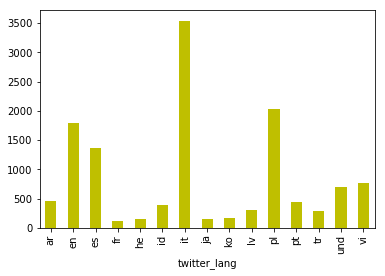

In [34]:
# .plot() is a pandas wrapper for matplotlib's plt.plot() 
lang_gb_mean['actor:followersCount'].plot(kind='bar', color='y')

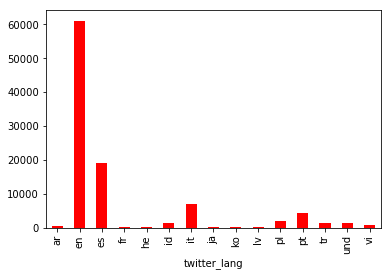

In [35]:
# .plot() is a pandas wrapper for matplotlib's plt.plot() 
lang_gb_sum['actor:followersCount'].plot(kind='bar', color='r')

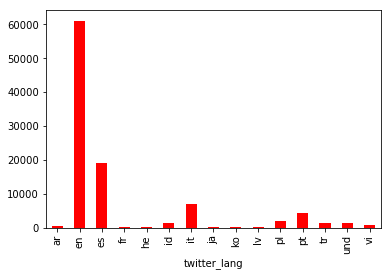

In [36]:
# A quick test 
maz_gb_sum = lang_gb.aggregate(np.sum)  
maz_gb_sum['actor:followersCount'].plot(kind='bar', color='r')

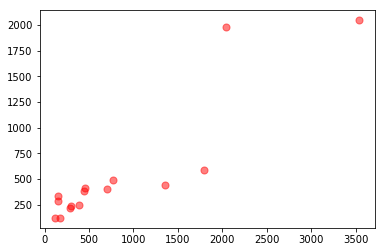

In [37]:
# more base matplotlib 
plt.scatter(x=lang_gb_mean['actor:followersCount'],\
            y=lang_gb_mean['actor:friendsCount'],\
            alpha=0.5,\
            s=50,\
            color='red',\
            marker='o')

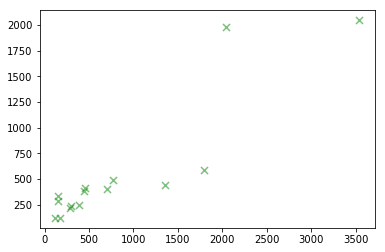

In [38]:
# more base matplotlib with change color and marker
plt.scatter(x=lang_gb_mean['actor:followersCount'],\
            y=lang_gb_mean['actor:friendsCount'],\
            alpha=0.5,\
            s=50,\
            color='g',\
            marker='x')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e3cb71290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4e3c430610>]], dtype=object)

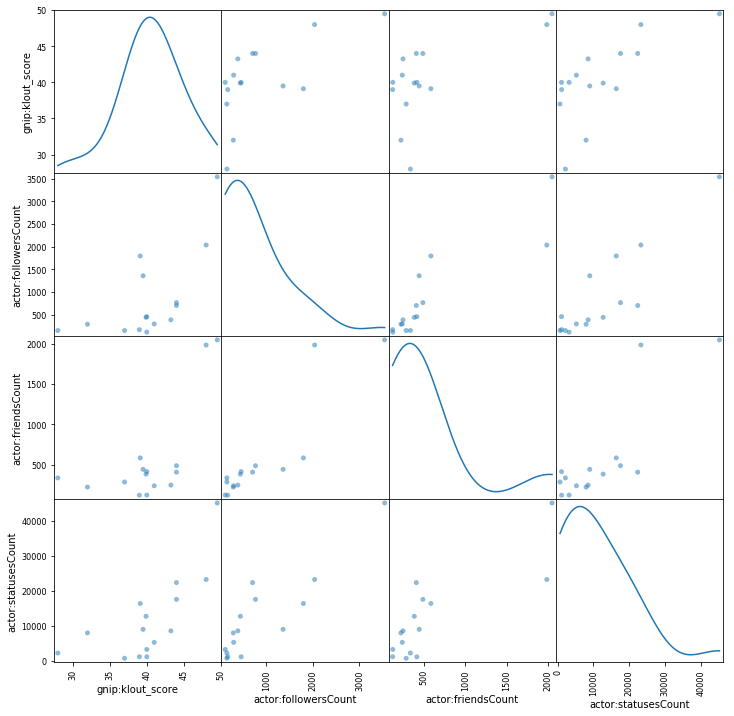

In [39]:
# now read the docs and copypasta a neat-looking plot
from pandas.plotting import scatter_matrix

scatter_matrix(lang_gb_mean, alpha=0.5, figsize=(12,12), diagonal='kde', s=100)

In [40]:
# make up some data with large-scale patterns and a datetime index
df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2017', periods=1000), columns=list('WXYZ'))
df = df.cumsum()
df.head()

,W,X,Y,Z
2017-01-01,-0.790873,0.065952,1.383131,0.778076
2017-01-02,-1.717465,1.252604,0.148248,2.604638
2017-01-03,-0.603802,1.526570,-1.730512,2.824772
2017-01-04,1.299022,2.041908,-1.638087,3.423833
2017-01-05,-0.079613,3.057004,-1.118812,4.287228


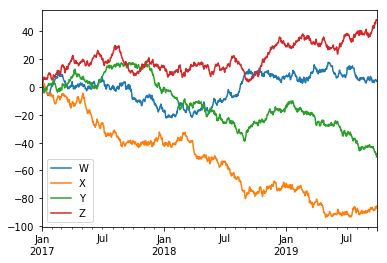

In [41]:
df.plot()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e32b42e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4e329693d0>]], dtype=object)

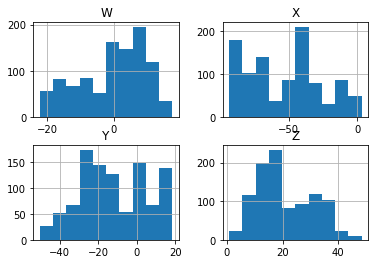

In [42]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e325f42d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4e32425210>]], dtype=object)

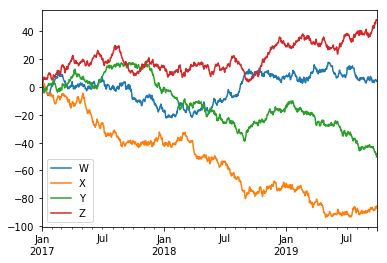

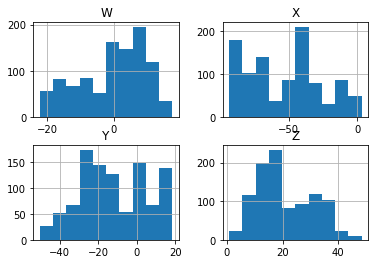

In [43]:
# Using prettyplotlib lib to plot graphs
import prettyplotlib

df.plot()
df.hist()

In [44]:
# Visualizing the distribution of a dataset

In [45]:
%matplotlib inline

In [46]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [47]:
import seaborn as sns
sns.set(color_codes=True)

In [48]:
np.random.seed(sum(map(ord, "distributions")))

[ 0.42852369  1.19133255 -0.45820746 -1.85860798  1.02445299  0.69330216
  0.78849804  0.38978006  0.28186484  2.87595634 -0.47628215  1.68025623
 -0.39550873 -0.31309963 -1.08837344  1.35804163  0.99799477 -1.56900497
  0.45547916 -1.21679124 -0.75801737 -0.07849588 -0.10971737  0.81419187
  0.85226952  0.63110924 -0.00947497  0.89289944  1.38285579 -1.49399717
  0.47088875 -0.01288971 -0.44335464  2.14135081 -1.30731012  0.85712756
 -1.33106341  2.02990049  0.4914988   1.13272871  0.31018322 -0.68251238
 -1.03515012  0.92090423 -0.2528402   0.04264866  0.12932479  0.22791984
  0.27501328  2.25623038  0.86225469  0.83121643 -1.02652783 -0.57345982
  0.44343461 -0.23975428 -0.78221362  0.9580867   0.46108662 -0.03729805
 -0.15460078  0.68695857  0.42026656 -0.19984644 -1.83236953 -0.6656998
 -1.31992855 -0.36497473  0.17610984 -0.54795825 -0.52560693  0.19350884
 -0.93389106 -0.99318536 -0.38978803  0.0071343   0.94001567  1.1012718
 -0.05460403 -1.09726954  0.27576366 -0.6408722  -0.0

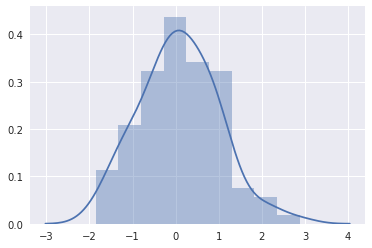

In [49]:
# Plotting univariate distributions

#The most convenient way to take a quick look at a univariate distribution in seaborn is the *distplot function. 
#By default, this will draw a histogram 

x = np.random.normal(size=100)
print x

sns.distplot(x);

In [50]:
# Histograms

# Histograms are likely familiar, and a hist function already exists in matplotlib. 
# A histogram represents the distribution of data by forming bins along the range of the data 
# and then drawing bars to show the number of observations that fall in each bin.

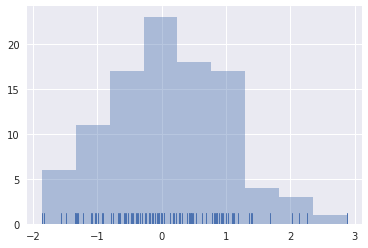

In [51]:
# Remove the density curve and add a rug plot, which draws a small vertical tick at each observation. You can make the rug plot itself with the rugplot function, 
# but it is also available in distplot:

sns.distplot(x, kde=False, rug=True);

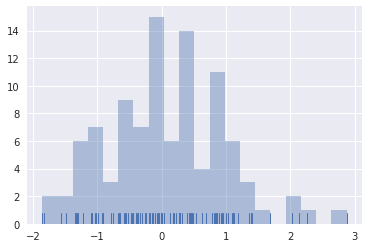

In [52]:
# When drawing histograms, the main choice you have is the number of bins to use and where to place them. 
# distplot uses a simple rule to make a good guess for what the right number is by default, 
# but trying more or fewer bins might reveal other features in the data:

sns.distplot(x, bins=20, kde=False, rug=True);

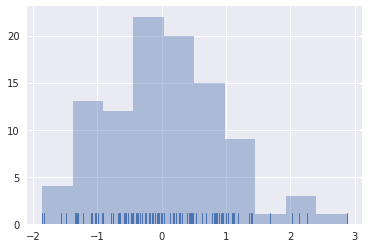

In [53]:
sns.distplot(x, bins=10, kde=False, rug=True);

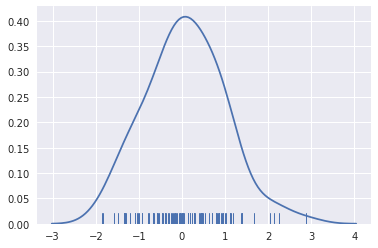

In [54]:
# Kernel density estimaton

# The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution. 
# Like the histogram, the KDE plots encodes the density of observations on one axis with height along the other axis:

sns.distplot(x, hist=False, rug=True);

In [55]:
# Drawing a KDE is more computationally involved than drawing a histogram. 
# What happens is that each observation is first replaced with a normal (Gaussian) curve centered at that value:

[ 0.7352826   0.7171099   0.96283844  0.22137047 -0.07936705  2.35623791
  0.16982373 -1.65983154  1.38854404 -1.56926211 -0.73055429 -0.60257736
  0.89826375  0.78206761 -0.14125437 -0.44724594  0.2919698   0.42711494
  0.59431423  0.1539176  -1.53200567 -0.56955878  0.78831908  0.28275372
 -0.58649792 -1.16397748  0.28894759 -0.2634361  -1.50246105 -1.75745611]
0.522688154848


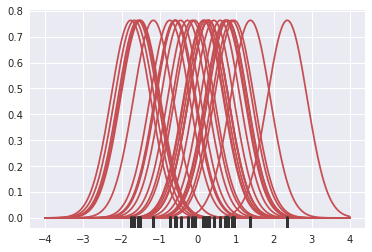

In [56]:
x = np.random.normal(0, 1, size=30)
print x
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
print bandwidth
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

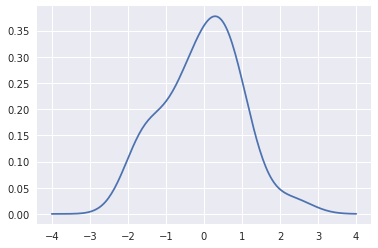

In [57]:
# these curves are summed to compute the value of the density at each point in the support grid. 
# The resulting curve is then normalized so that the area under it is equal to 1:

density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

In [58]:
# Plotting bivariate distributions
# It can also be useful to visualize a bivariate distribution of two variables. 
# The easiest way to do this in seaborn is to just use the *jointplot function, which creates a 
# multi-panel figure that shows both the bivariate (or joint) relationship between two variables 
# along with the univariate (or marginal) distribution of each on separate axes.

In [59]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
print df.tail()

            x         y
195  0.432007  2.358734
196  0.584404  0.534597
197  1.029334  1.239094
198  0.475828  0.154452
199 -0.011736  1.827990


In [60]:
# Scatterplots
# The most familiar way to visualize a bivariate distribution is a scatterplot, 
# where each observation is shown with point at the x and y values. This is analgous to a rug plot on two dimensions. You can draw a scatterplot with the matplotlib plt.scatter function, 
# and it is also the default kind of plot shown by the jointplot function:

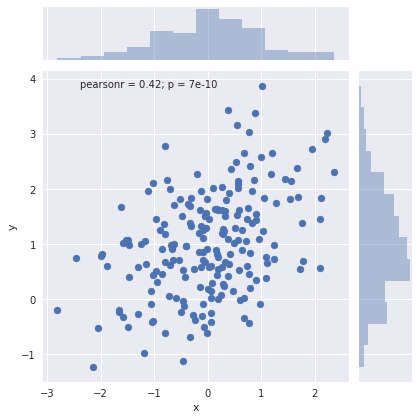

In [61]:
sns.jointplot(x="x", y="y", data=df);

In [62]:
# Hexbin plots
# The bivariate analogue of a histogram is known as a "hexbin" plot, because it shows the 
# counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. 
# It's available through the matplotlib plt.hexbin function and as a style in jointplot. 
# It looks best with a white background:

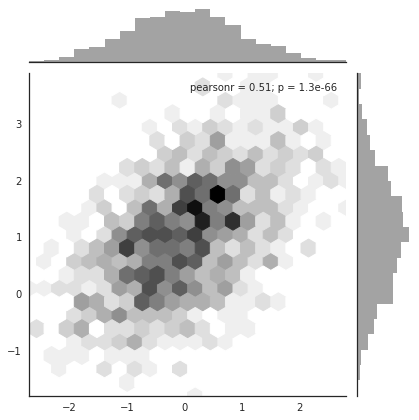

In [63]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

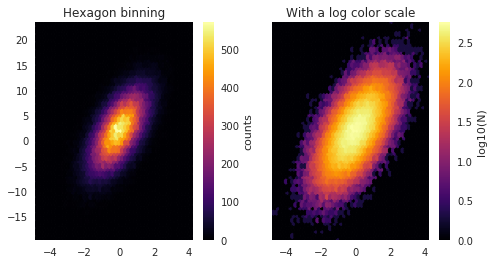

In [64]:
np.random.seed(0)
n = 100000
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(7, 4))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=50, cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

plt.show()

Axes(0.125,0.125;0.775x0.755)


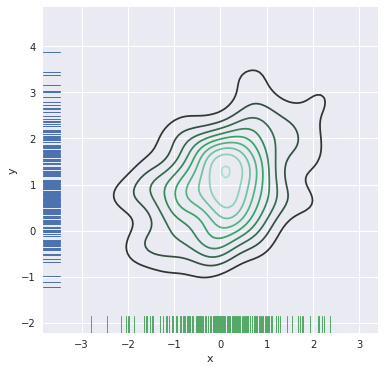

In [65]:
# Kernel density estimation

# two-dimensional kernel density plot with the kdeplot function. 
# This allows you to draw this kind of plot onto a specific (and possibly already existing) matplotlib axes, whereas the jointplot function manages its own figure:

f, ax = plt.subplots(figsize=(6, 6))
print sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);


In [66]:
# Visualizing pairwise relationships in a dataset
# To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot function. 
# This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. 
# By default, it also draws the univariate distribution of each variable on the diagonal Axes:

# Note-- "iris" is file name.csv on https://github.com/mwaskom/seaborn-data

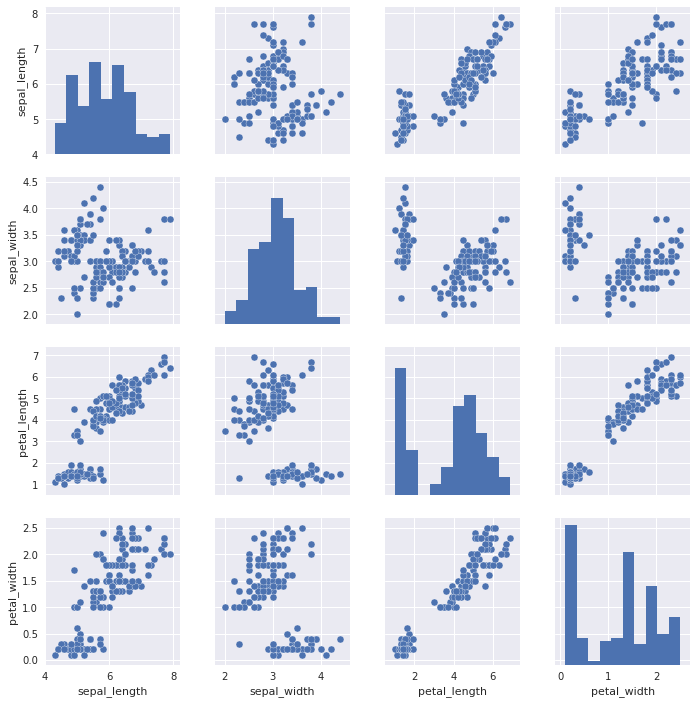

In [67]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

/bda/app/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


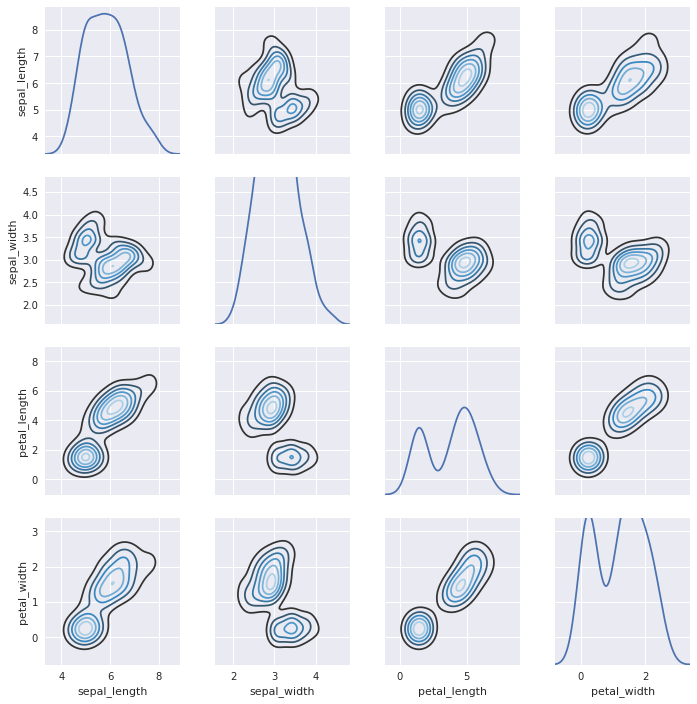

In [68]:
# Much like the relationship between jointplot and JointGrid, the pairplot function is built on top of a PairGrid object, w
# hich can be used directly for more flexibility:

g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

In [69]:
# Visualizing linear relationships

In [70]:
%matplotlib inline

In [71]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [72]:
import seaborn as sns
sns.set(color_codes=True)

In [73]:
np.random.seed(sum(map(ord, "regression")))

In [74]:
tips = sns.load_dataset("tips")

In [75]:
# Functions to draw linear regression models
#Two main functions in seaborn are used to visualize a linear relationship as determined through regression. 
#These functions, regplot and lmplot are closely related, and share much of their core functionality. 
#It is important to understand the ways they differ, however, so that you can quickly choose the correct tool 
#for particular job.
#In the simplest invocation, both functions draw a scatterplot of two variables, x and y, 
#and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval 
#for that regression:

     total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2


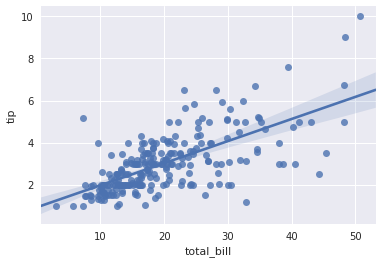

In [76]:
print tips.tail()
sns.regplot(x="total_bill", y="tip", data=tips);

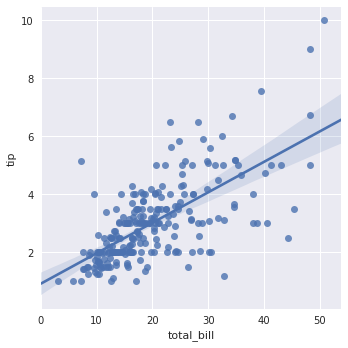

In [77]:
sns.lmplot(x="total_bill", y="tip", data=tips);

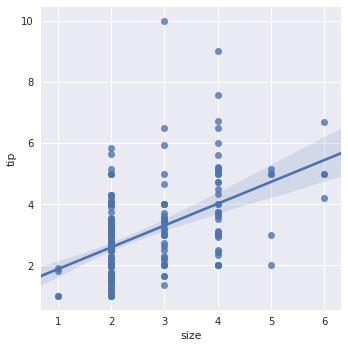

In [78]:
sns.lmplot(x="size", y="tip", data=tips);

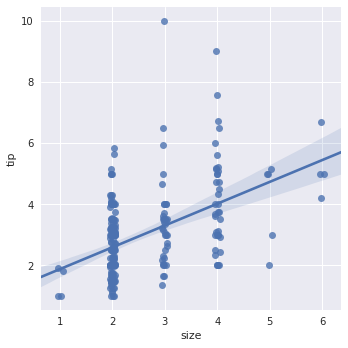

In [79]:
# One option is to add some random noise ("jitter") to the discrete values to make the distribution of those values more clear. Note that jitter is applied only to 
# the scatterplot data and does not influence the regression line fit itself:

sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

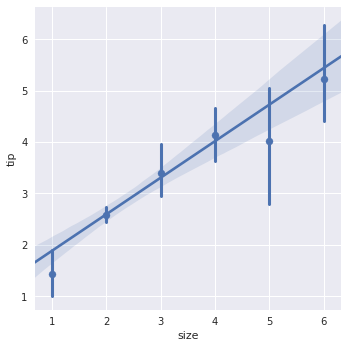

In [80]:
# A second option is to collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:

sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

In [81]:
# Fitting different kinds of models

# The simple linear regression model used above is very simple to fit, however, 
# it is not appropriate for some kinds of datasets. 
# The Anscombe's quartet <https://en.wikipedia.org/wiki/Anscombe%27s_quartet>_ dataset shows a few examples where simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences. 
# For example, in the first case, the linear regression is a good model:

In [82]:
anscombe = sns.load_dataset("anscombe")

In [83]:
print anscombe.tail()

   dataset     x      y
39      IV   8.0   5.25
40      IV  19.0  12.50
41      IV   8.0   5.56
42      IV   8.0   7.91
43      IV   8.0   6.89


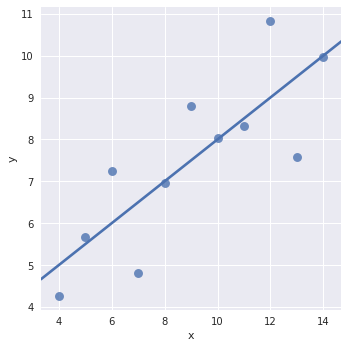

In [84]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

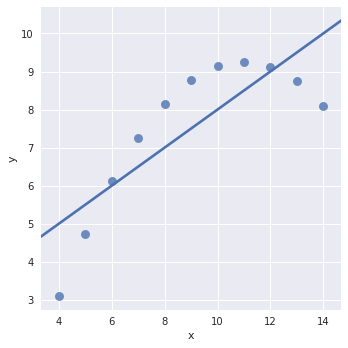

In [85]:
# The linear relationship in the second dataset is the same, but the plot clearly shows that this is not a good model:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

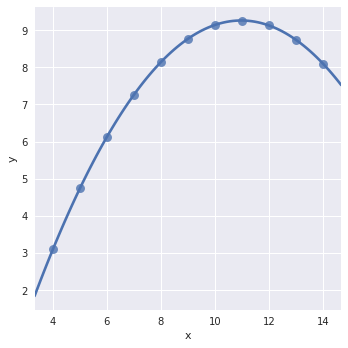

In [86]:
# In the presence of these kind of higher-order relationships, lmplot and regplot can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset:

sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

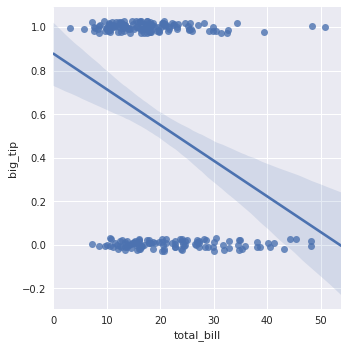

In [87]:
# When the y variable is binary, simple linear regression also "works" but provides implausible predictions:

tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

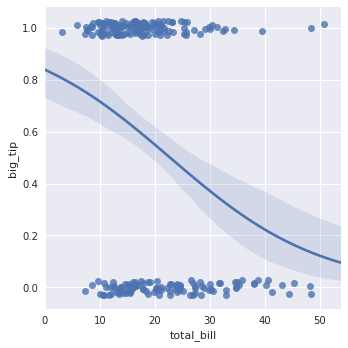

In [88]:
# The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of y = 1 for a given value of x:

sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

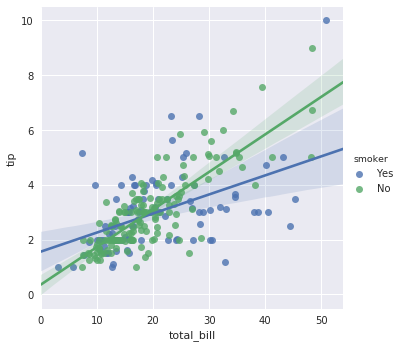

In [89]:
# Conditioning on other variables

# The plots above show many ways to explore the relationship between a pair of variables. Often, however, 
# a more interesting question is "how does the relationship between these two variables change as a 
# function of a third variable?" This is where the difference between regplot and lmplot appears. 
# While regplot always shows a single relationship, lmplot combines regplot with FacetGrid to 
# provide an easy interface to show a linear regression on "faceted" plots that allow you to 
# explore interactions with up to three additional categorical variables.

#The best way to separate out a relationship is to plot both levels on the same axes and to use color to distinguish them:

sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

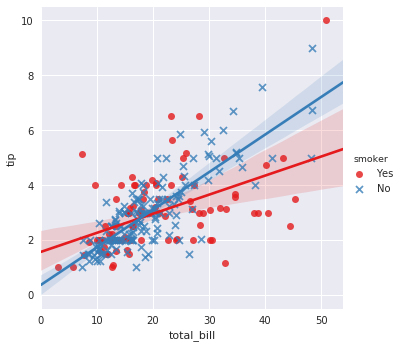

In [90]:
# In addition to color, it's possible to use different scatterplot markers to make plots the reproduce to black and white better. 
# You also have full control over the colors used:

sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

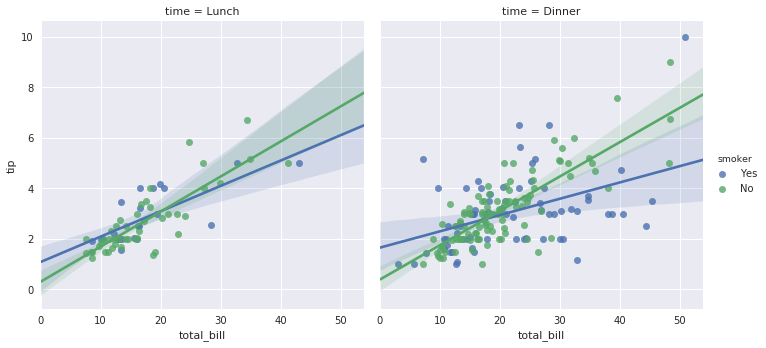

In [91]:
# To add another variable, you can draw multiple "facets" which each level of the variable appearing in the rows or columns of the grid:

sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

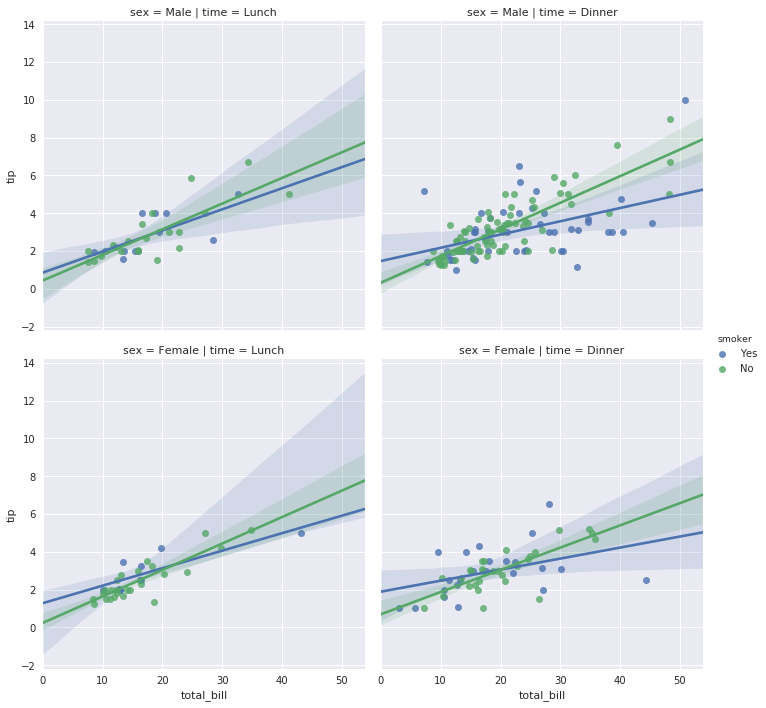

In [92]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

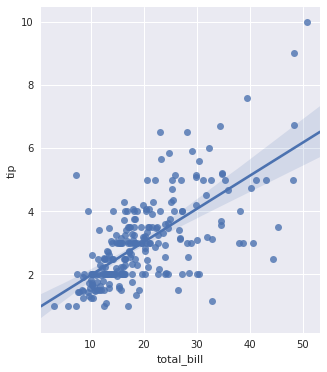

In [93]:
# Controlling the size and shape of the plot

# Before we noted that the default plots made by regplot and lmplot look the same but on axes that have a different size and shape. 
# This is because regplot is an "axes-level" function draws onto a specific axes. This means that you can make multi-panel figures yourself and control exactly where the regression plot goes. If no axes object is explictly provided, it simply uses the "currently active" axes, which is why the default plot has the same size and shape as most other matplotlib functions. 
# To control the size, you need to create a figure object yourself.

f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

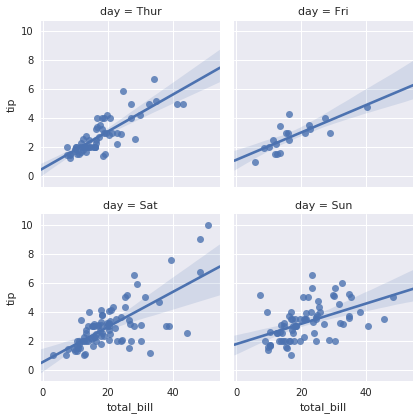

In [94]:
# In contrast, the size and shape of the lmplot figure is controlled through the FacetGrid interface using the size and aspect parameters, which apply to each facet in the plot, 
# not to the overall figure itself:

sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, size=3);

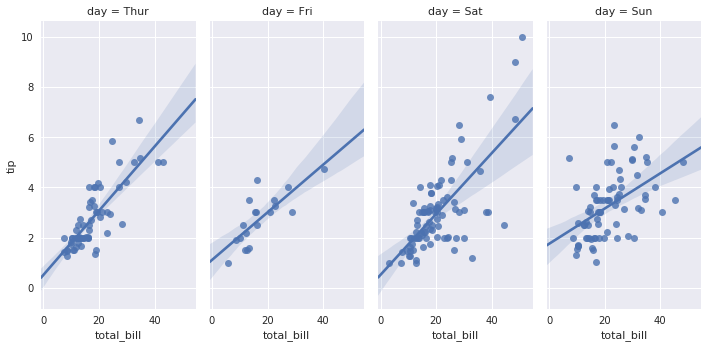

In [95]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

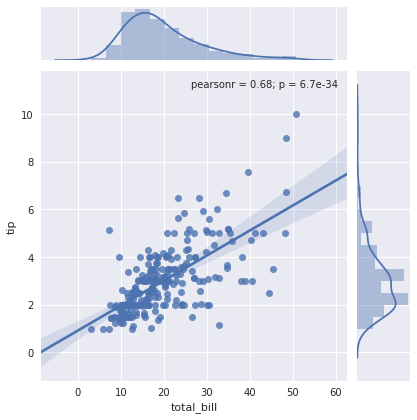

In [96]:
# Plotting a regression in other contexts

# A few other seaborn functions use regplot in the context of a larger, more complex plot. 
# The first is the jointplot function that we introduced in 
# the :ref:distributions tutorial <distribution_tutorial>. In addition to the plot styles previously discussed, 
# jointplot can use regplot to show the linear regression fit on the joint axes by passing kind="reg":

sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

In [97]:
# Plotting with categorical data

In [98]:
%matplotlib inline

In [99]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [100]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [101]:
np.random.seed(sum(map(ord, "categorical")))

In [102]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

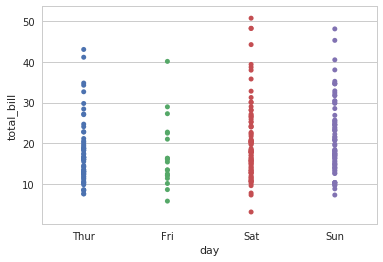

In [103]:
# Categorical scatterplots
# A simple way to show the the values of some quantitative variable across the levels of a categorical variable uses *stripplot, which generalizes a scatterplot to the case where one of the variables is categorical:

sns.stripplot(x="day", y="total_bill", data=tips);

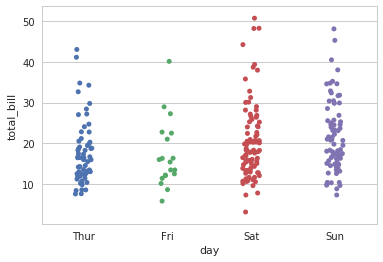

In [104]:
# In a strip plot, the scatterplot points will usually overlap. This makes it difficult to see the full distribution of data. One easy solution is to adjust the positions (only along the categorical axis) using some random "jitter":

sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

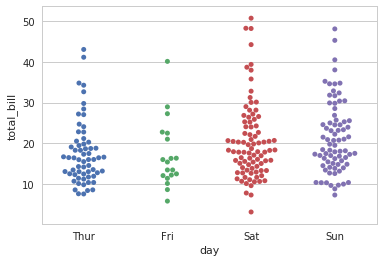

In [105]:
# A different approach would be to use the function *swarmplot, which positions each scatterplot point on the categorical axis with an algorithm that avoids overlapping points:

sns.swarmplot(x="day", y="total_bill", data=tips);

In [106]:
# Distributions of observations within categories
# At a certain point, the categorical scatterplot approach becomes limited in the information it can provide about the distribution of values within each category. There are several ways to summarize this information in ways that facilitate easy comparisons across the category levels. These generalize some of the approaches we discussed in the :ref:chapter <distribution_tutorial> to the case where we want to quickly compare across several distributions.



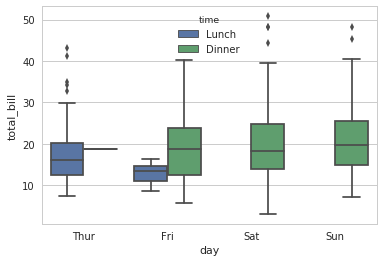

In [107]:
# The first is the familiar *boxplot. This kind of plot shows the three quartile values of the distribution along with extreme values. The "whiskers" extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. Importantly, this means that each value in the boxplot corresponds to an actual observation in the data:

sns.boxplot(x="day", y="total_bill", hue="time", data=tips);


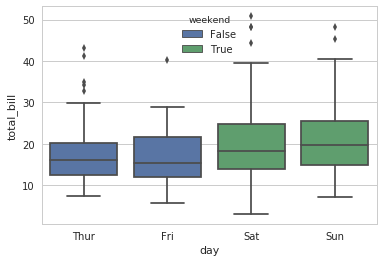

In [108]:
# For boxplots, the assumption when using a hue variable is that it is nested within the x or y variable. This means that by default, the boxes for different levels of hue will be offset, as you can see above. If your hue variable is not nested, you can set the dodge parameter to disable offsetting:

tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.boxplot(x="day", y="total_bill", hue="weekend", data=tips, dodge=False);

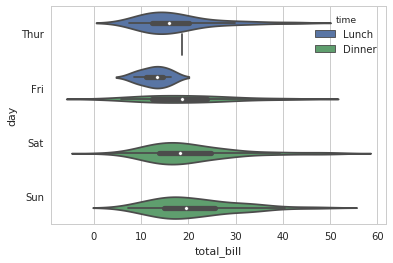

In [109]:
# Violinplots 
# A different approach is a *violinplot, which combines a boxplot with the kernel density estimation procedure described in the :ref:distributions <distribution_tutorial> tutorial:


sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

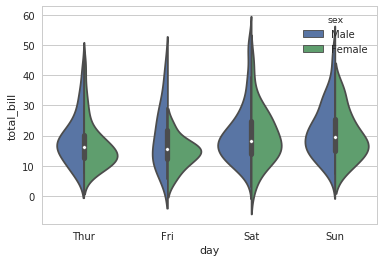

In [110]:
# It's also possible to "split" the violins when the hue parameter has only two levels, which can allow for a more efficient use of space:


sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

In [111]:
# Statistical estimation within categories
# Often, rather than showing the distribution within each category, you might want to show the central tendency of the values. Seaborn has two main ways to show this information, but importantly, the basic API for these functions is identical to that for the ones discussed above.


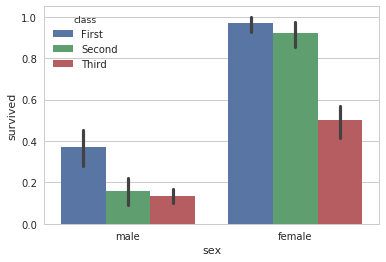

In [112]:
# Bar plots

sns.barplot(x="sex", y="survived", hue="class", data=titanic);

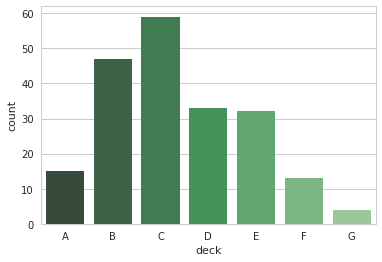

In [113]:
sns.countplot(x="deck", data=titanic, palette="Greens_d");


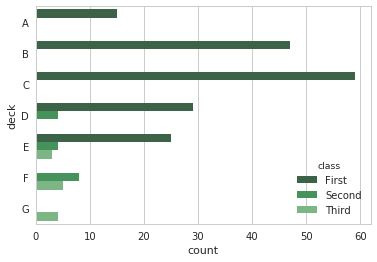

In [114]:
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d");